In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from warnings import filterwarnings
from torch import nn,optim,utils
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import gc

filterwarnings(action='ignore')

gc.collect()

75

In [2]:
device='cuda' if torch.cuda.is_available() else 'cpu'   

In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),
])


trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = utils.data.DataLoader(trainset, batch_size=200, shuffle=True, num_workers=2)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 14689179.88it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 434745.31it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 3477468.20it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 1854246.52it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



### Forward Process

In [24]:
def find_alpha_bar(t_size,variance_type='linear'):
    if t_size==1:
        
        return [1.]
    
    alpha_bar=torch.zeros(t_size)
    epsilon=1e-5
    
    if variance_type=='linear':
        beta = torch.linspace(0.+epsilon,1.-epsilon,t_size)
        alpha=1-beta
        
        for i,a in enumerate(alpha):
            if i==0:
                alpha_bar[i]=a
            else:
                alpha_bar[i]=alpha_bar[i-1]*a    
    elif variance_type=='cosine':
        coeff=1/t_size
        s=(1e-3)*8
        f=torch.zeros(t_size)
        for i in range(t_size):
            f[i]=torch.cos(torch.tensor((coeff*(i+1)+s)/(1+s)*(np.pi/2)))**2
            alpha_bar[i]=f[i]/f[0]
    
    return alpha_bar

In [27]:
def add_step_noise(origin_image,alpha_bar,step,norm_sample):
    return torch.sqrt(alpha_bar[step])*origin_image + torch.sqrt(1-alpha_bar[step])*norm_sample

In [28]:
dataiter = iter(trainloader)
images, labels = next(dataiter)

In [34]:
mean = 0.0
std_dev = 1.0

size = (images[0].shape) 

samples = torch.normal(mean, std_dev, size=size)

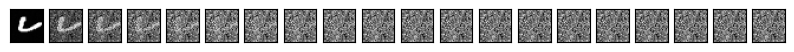

In [42]:
# Linear 
variance_type='linear'
step_num=20
origin_image=images[0]
alpha_bar=find_alpha_bar(step_num,variance_type)

fig, axs = plt.subplots(1, step_num, figsize=(10, 10))

for i in range(step_num):
    axs[i].imshow(add_step_noise(origin_image,alpha_bar,i,samples).T,cmap='gray')
    axs[i].set_xticks([])  
    axs[i].set_yticks([])

plt.show()

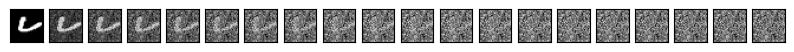

In [41]:
# Cosine
variance_type='cosine'
step_num=20
origin_image=images[0]
alpha_bar=find_alpha_bar(step_num,variance_type)

fig, axs = plt.subplots(1, step_num, figsize=(10, 10))

for i in range(step_num):
    axs[i].imshow(add_step_noise(origin_image,alpha_bar,i,samples).T,cmap='gray')
    axs[i].set_xticks([])  
    axs[i].set_yticks([])

plt.show()